In [59]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import requests
import numbers
import math
import seaborn as sns
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'

### 데이터 불러오기

In [3]:
file = glob.glob('./data/*.csv')
file

['./data/olist_sellers_dataset.csv',
 './data/product_category_name_translation.csv',
 './data/olist_orders_dataset.csv',
 './data/olist_order_items_dataset.csv',
 './data/review.csv',
 './data/olist_customers_dataset.csv',
 './data/review_sm.csv',
 './data/olist_geolocation_dataset.csv',
 './data/olist_order_payments_dataset.csv',
 './data/olist_order_reviews_dataset.csv',
 './data/olist_products_dataset.csv']

In [4]:
order = pd.read_csv(file[2])
products = pd.read_csv(file[10])
item = pd.read_csv(file[3])
customers = pd.read_csv(file[5])
sellers = pd.read_csv(file[0])
geolocation = pd.read_csv(file[7])
review = pd.read_csv(file[9])

In [5]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### 데이터 전처리

In [6]:
orders_df = order[["order_id","customer_id", "order_purchase_timestamp", "order_delivered_customer_date"]]

In [7]:
orders_df = orders_df.dropna()

In [8]:
# datetime 형식으로 변경
orders_df["order_purchase_date"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_delivery_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])

In [9]:
# 배송 기간 칼럼 추가
orders_df["delivery_period"] = orders_df["order_delivery_date"]-orders_df["order_purchase_date"]

In [10]:
orders_df["delivery_period"] = orders_df["delivery_period"].dt.days

In [11]:
orders_df

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_purchase_date,order_delivery_date,delivery_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-13 21:18:39,2018-02-16 18:17:02,2
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-09 09:54:05,2017-03-17 15:08:01,8
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-06 12:58:58,2018-02-28 17:37:56,22
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-27 14:46:43,2017-09-21 11:24:17,24
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-08 21:28:27,2018-01-25 23:32:54,17


In [12]:
# 필요없는 칼럼 삭제
orders_df = orders_df.drop(columns=["order_purchase_timestamp","order_delivered_customer_date","order_purchase_date","order_delivery_date"])

In [13]:
orders_df

,order_id,customer_id,delivery_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,24
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17


In [14]:
item_df = item[["order_id", "seller_id"]]

In [15]:
# merge
oi_df = pd.merge(orders_df, item_df , on="order_id", how = "outer")

In [16]:
oi_df

,order_id,customer_id,delivery_period,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...
112645,feebdfdb4759bd4600d52547c81b4fa8,NaN,NaN,7d76b645482be4a332374e8223836592
112646,ff0768e3356919b32e3d7f30baecfcfb,NaN,NaN,3e8bd881d92466e63ba9e3e809cd3c50
112647,ff358345576214cc9e08488188973c84,NaN,NaN,128639473a139ac0f3e5f5ade55873a5
112648,ff536d93ae4214b4d51c2894ccfc569f,NaN,NaN,4e922959ae960d389249c378d1c939f5


In [17]:
customers_df = customers[["customer_id","customer_city"]]

In [18]:
oic_df = pd.merge(oi_df, customers_df, on = "customer_id", how="outer")

In [19]:
oic_df

,order_id,customer_id,delivery_period,seller_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,289cdb325fb7e7f891c38608bf9e0962,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,4869f7a5dfa277a7dca6462dcf3b52b2,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,66922902710d126a0e7d26b0e3805106,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0,2c9e548be18521d1c43cde1c582c6de8,santo andre
...,...,...,...,...,...
115610,NaN,6a65b5d6d4f4c9dfda93798cf014ee47,NaN,NaN,sao paulo
115611,NaN,9ce70b8dafe76524f3d5e5e68cbf29f5,NaN,NaN,ribeirao preto
115612,NaN,2a6fc1968c4a29c9c258bb1994afbc7f,NaN,NaN,volta redonda
115613,NaN,f83083fcbc51d12f8279b5713c2d4b4d,NaN,NaN,araguaina


In [20]:
sellers_df = sellers[["seller_id","seller_city"]]

In [21]:
oics_df = pd.merge(oic_df, sellers_df, on= "seller_id", how = "outer")

In [22]:
oics_df

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,3.0,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,10.0,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua
...,...,...,...,...,...,...
115610,NaN,6a65b5d6d4f4c9dfda93798cf014ee47,NaN,NaN,sao paulo,NaN
115611,NaN,9ce70b8dafe76524f3d5e5e68cbf29f5,NaN,NaN,ribeirao preto,NaN
115612,NaN,2a6fc1968c4a29c9c258bb1994afbc7f,NaN,NaN,volta redonda,NaN
115613,NaN,f83083fcbc51d12f8279b5713c2d4b4d,NaN,NaN,araguaina,NaN


In [23]:
# 결측치 제거
oics_df = oics_df.dropna()

In [24]:
# 중복값 제거
geolocation = geolocation.drop_duplicates(["geolocation_city"], ignore_index = True)

In [25]:
# customer용, seller용 구분하기 위해 복사
geolocation_c = geolocation.copy()
geolocation_s = geolocation.copy()

In [26]:
geolocation_c.rename(columns={"geolocation_lat":"customer_lat","geolocation_lng":"customer_lng","geolocation_city":"customer_city"}, inplace=True)

In [27]:
geolocation_s.rename(columns={"geolocation_lat":"seller_lat","geolocation_lng":"seller_lng","geolocation_city":"seller_city"}, inplace=True)

In [28]:
geolocation_c = geolocation_c[["customer_city","customer_lat","customer_lng"]]

In [29]:
geolocation_s = geolocation_s[["seller_city","seller_lat","seller_lng"]]

In [30]:
geolocation_c

,customer_city,customer_lat,customer_lng
0,sao paulo,-23.545621,-46.639292
1,são paulo,-23.547762,-46.635361
2,sao bernardo do campo,-23.556812,-46.657135
3,jundiaí,-23.216648,-46.861371
4,taboão da serra,-23.574798,-46.650106
...,...,...,...
8006,ibiaçá,-28.053148,-51.861135
8007,santa cecilia do sul,-28.160371,-51.936922
8008,ciríaco,-28.342325,-51.876023
8009,estação,-27.921611,-52.264586


In [31]:
geolocation_s

,seller_city,seller_lat,seller_lng
0,sao paulo,-23.545621,-46.639292
1,são paulo,-23.547762,-46.635361
2,sao bernardo do campo,-23.556812,-46.657135
3,jundiaí,-23.216648,-46.861371
4,taboão da serra,-23.574798,-46.650106
...,...,...,...
8006,ibiaçá,-28.053148,-51.861135
8007,santa cecilia do sul,-28.160371,-51.936922
8008,ciríaco,-28.342325,-51.876023
8009,estação,-27.921611,-52.264586


In [32]:
oics_df

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,3.0,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,10.0,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua
...,...,...,...,...,...,...
112437,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,8.0,babcc0ab201e4c60188427cae51a5b8b,ferraz de vasconcelos,porto ferreira
112438,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,9.0,d263fa444c1504a75cbca5cc465f592a,fortaleza,americana
112439,ba4ff7bab012df64eed239c402ba6a0d,48ebd9467fef647e9a0cd9c1b9bdbe24,18.0,d6cd01c59123df02fc226eadbadb5f89,palmeira,sao paulo
112442,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,21.0,edf3fabebcc20f7463cc9c53da932ea8,teofilo otoni,sao paulo


In [33]:
oicsg_df = pd.merge(oics_df, geolocation_c, on = "customer_city", how = "left")

In [34]:
oicsg_df = pd.merge(oicsg_df, geolocation_s, on = "seller_city", how = "left")

In [35]:
oicsg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110196 entries, 0 to 110195
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         110196 non-null  object 
 1   customer_id      110196 non-null  object 
 2   delivery_period  110196 non-null  float64
 3   seller_id        110196 non-null  object 
 4   customer_city    110196 non-null  object 
 5   seller_city      110196 non-null  object 
 6   customer_lat     110129 non-null  float64
 7   customer_lng     110129 non-null  float64
 8   seller_lat       108609 non-null  float64
 9   seller_lng       108609 non-null  float64
dtypes: float64(5), object(5)
memory usage: 9.2+ MB


In [36]:
# 결측치 제거
oicsg_df = oicsg_df.dropna()

In [37]:
oicsg_df.shape

(108547, 10)

In [38]:
# 경도, 위도 값 이용하여 거리 구하는 함수
class GeoUtil:
    """
    Geographical Utils
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)*100

In [39]:
# 거리 계산
distance = []
for i,j,a,b in zip(oicsg_df["customer_lng"],oicsg_df["customer_lat"],oicsg_df["seller_lng"],oicsg_df["seller_lat"]):
    distance.append(GeoUtil.get_harversion_distance(i,j,a,b))

In [40]:
len(distance)

108547

In [41]:
# 거리 칼럼 추가
oicsg_df["distance"] = distance

In [42]:
oicsg_df

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city,customer_lat,customer_lng,seller_lat,seller_lng,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua,-23.545621,-46.639292,-23.680114,-46.452454,24.20784
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua,-23.482623,-46.374490,-23.680114,-46.452454,23.35313
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua,-22.689713,-46.982493,-23.680114,-46.452454,122.73232
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,3.0,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua,-23.559508,-46.775873,-23.680114,-46.452454,35.57437
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,10.0,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua,-29.946414,-51.052914,-23.680114,-46.452454,832.79555
...,...,...,...,...,...,...,...,...,...,...,...
110191,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,8.0,babcc0ab201e4c60188427cae51a5b8b,ferraz de vasconcelos,porto ferreira,-23.535777,-46.372827,-21.858555,-47.484035,218.57344
110192,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,9.0,d263fa444c1504a75cbca5cc465f592a,fortaleza,americana,-3.725240,-38.545775,-22.753573,-47.339412,2317.96514
110193,ba4ff7bab012df64eed239c402ba6a0d,48ebd9467fef647e9a0cd9c1b9bdbe24,18.0,d6cd01c59123df02fc226eadbadb5f89,palmeira,sao paulo,-25.428016,-50.001658,-23.545621,-46.639292,399.44887
110194,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,21.0,edf3fabebcc20f7463cc9c53da932ea8,teofilo otoni,sao paulo,-17.877615,-41.500600,-23.545621,-46.639292,826.14714


In [43]:
# 이상치 제거
oicsg_df2 = oicsg_df[(oicsg_df["distance"]<4000)]

### 데이터 시각화

<AxesSubplot: xlabel='distance', ylabel='delivery_period'>

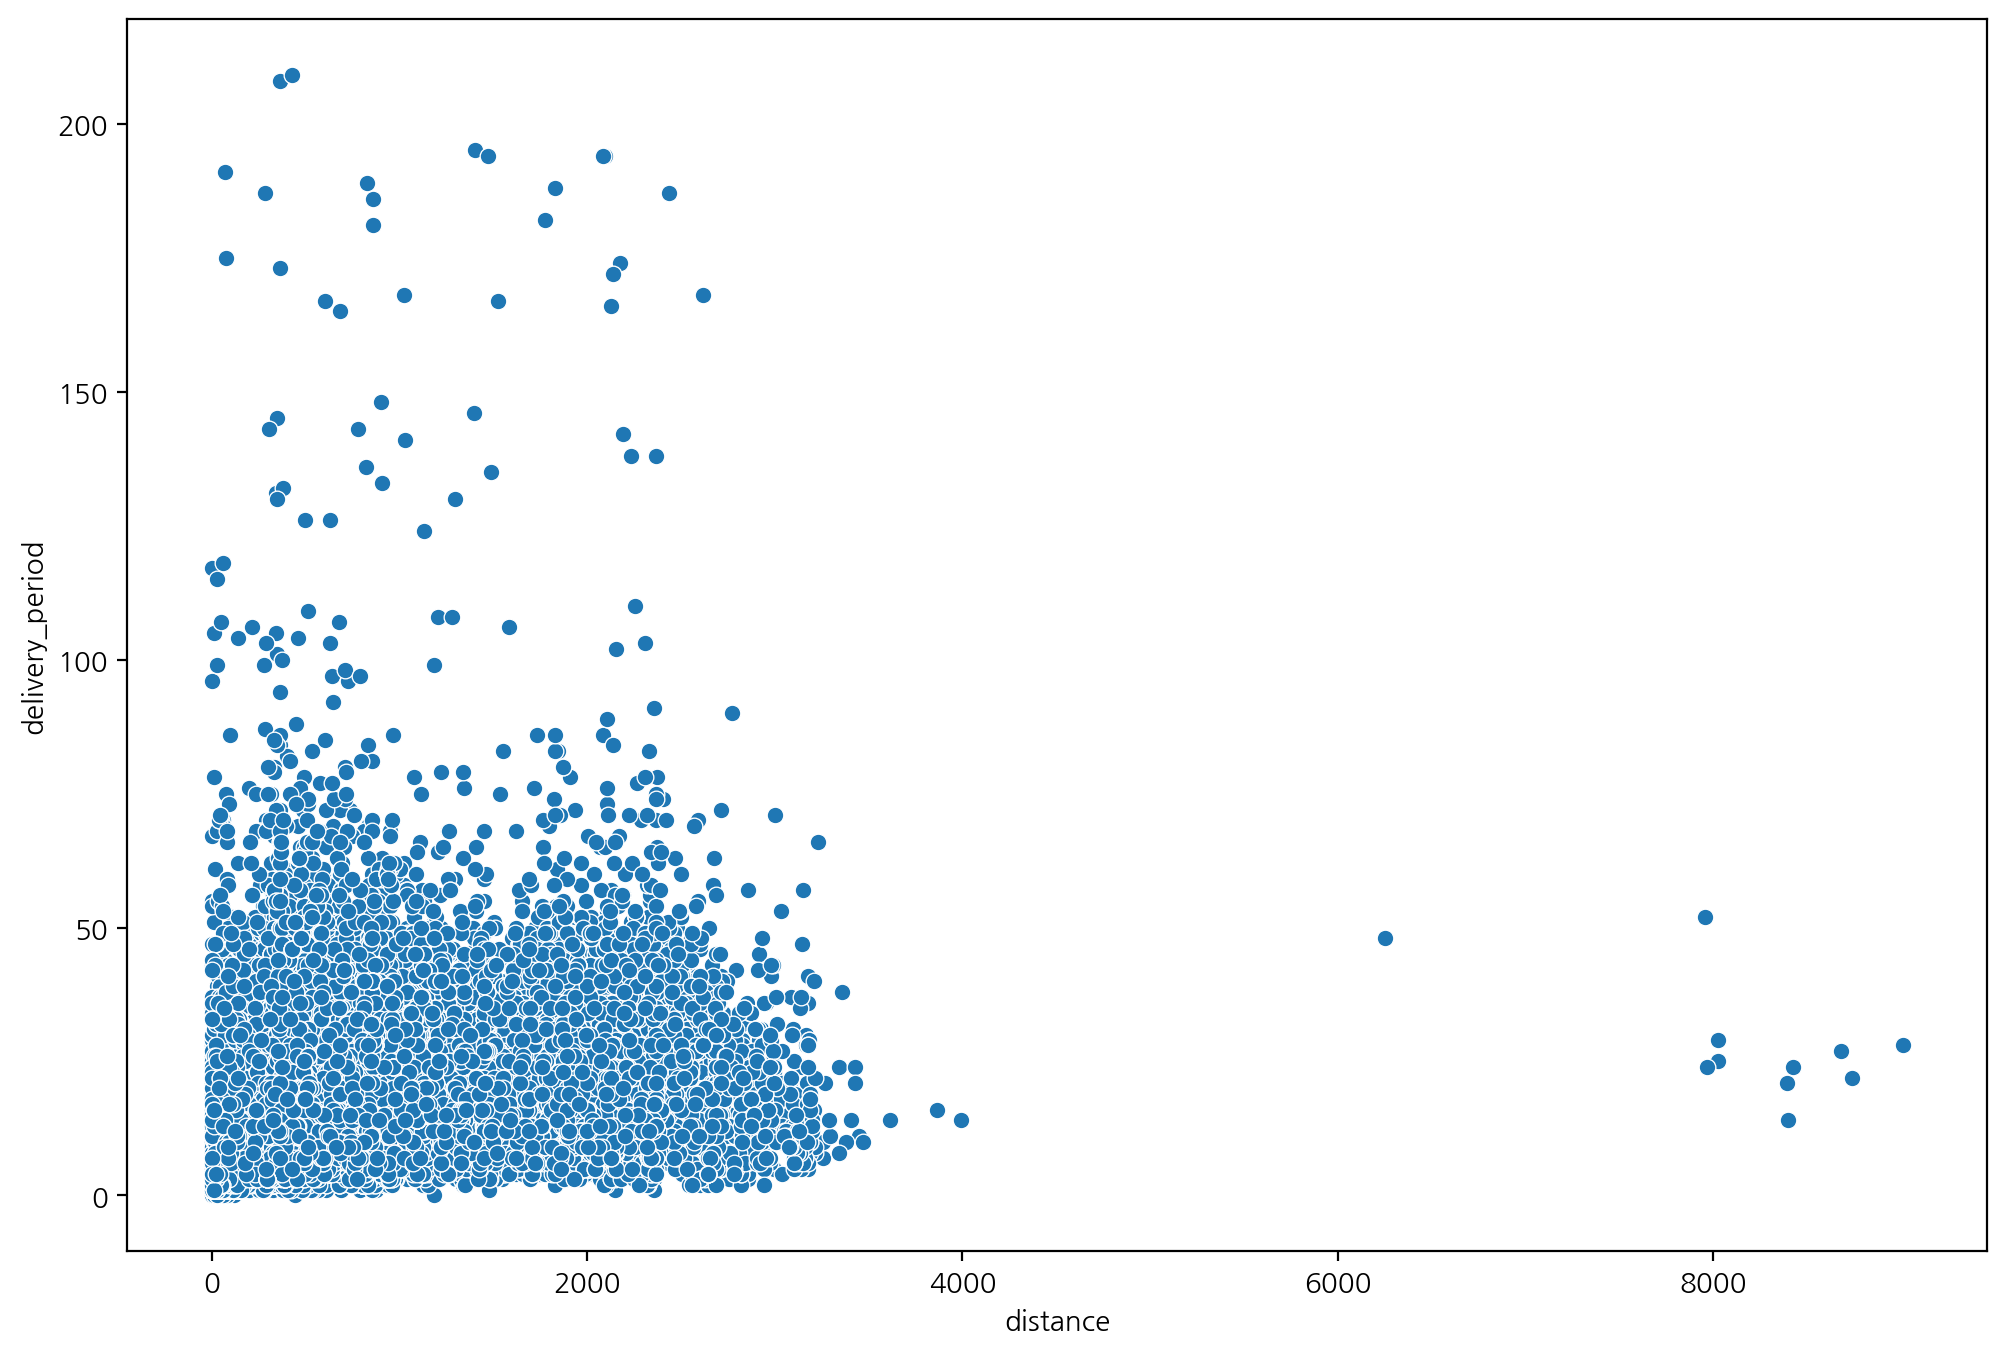

In [44]:
# 이상치 제거 전 시각화
plt.figure(figsize=(12,8))
sns.scatterplot(data = oicsg_df, x= "distance", y="delivery_period")

In [65]:
oicsg_df2

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city,customer_lat,customer_lng,seller_lat,seller_lng,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua,-23.545621,-46.639292,-23.680114,-46.452454,24.20784
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua,-23.482623,-46.374490,-23.680114,-46.452454,23.35313
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,6.0,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua,-22.689713,-46.982493,-23.680114,-46.452454,122.73232
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,3.0,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua,-23.559508,-46.775873,-23.680114,-46.452454,35.57437
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,10.0,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua,-29.946414,-51.052914,-23.680114,-46.452454,832.79555
...,...,...,...,...,...,...,...,...,...,...,...
110191,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,8.0,babcc0ab201e4c60188427cae51a5b8b,ferraz de vasconcelos,porto ferreira,-23.535777,-46.372827,-21.858555,-47.484035,218.57344
110192,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,9.0,d263fa444c1504a75cbca5cc465f592a,fortaleza,americana,-3.725240,-38.545775,-22.753573,-47.339412,2317.96514
110193,ba4ff7bab012df64eed239c402ba6a0d,48ebd9467fef647e9a0cd9c1b9bdbe24,18.0,d6cd01c59123df02fc226eadbadb5f89,palmeira,sao paulo,-25.428016,-50.001658,-23.545621,-46.639292,399.44887
110194,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,21.0,edf3fabebcc20f7463cc9c53da932ea8,teofilo otoni,sao paulo,-17.877615,-41.500600,-23.545621,-46.639292,826.14714


In [69]:
oicsg_df2 = oicsg_df2.rename(columns={"distance":"거리(km)","delivery_period":"배송기간(일)","customer_lat":"고객위치 위도","customer_lng":"고객위치 경도","seller_lat":"판매자위치 위도","seller_lng":"판매자위치 경도"})

<AxesSubplot: xlabel='거리(km)', ylabel='배송기간(일)'>

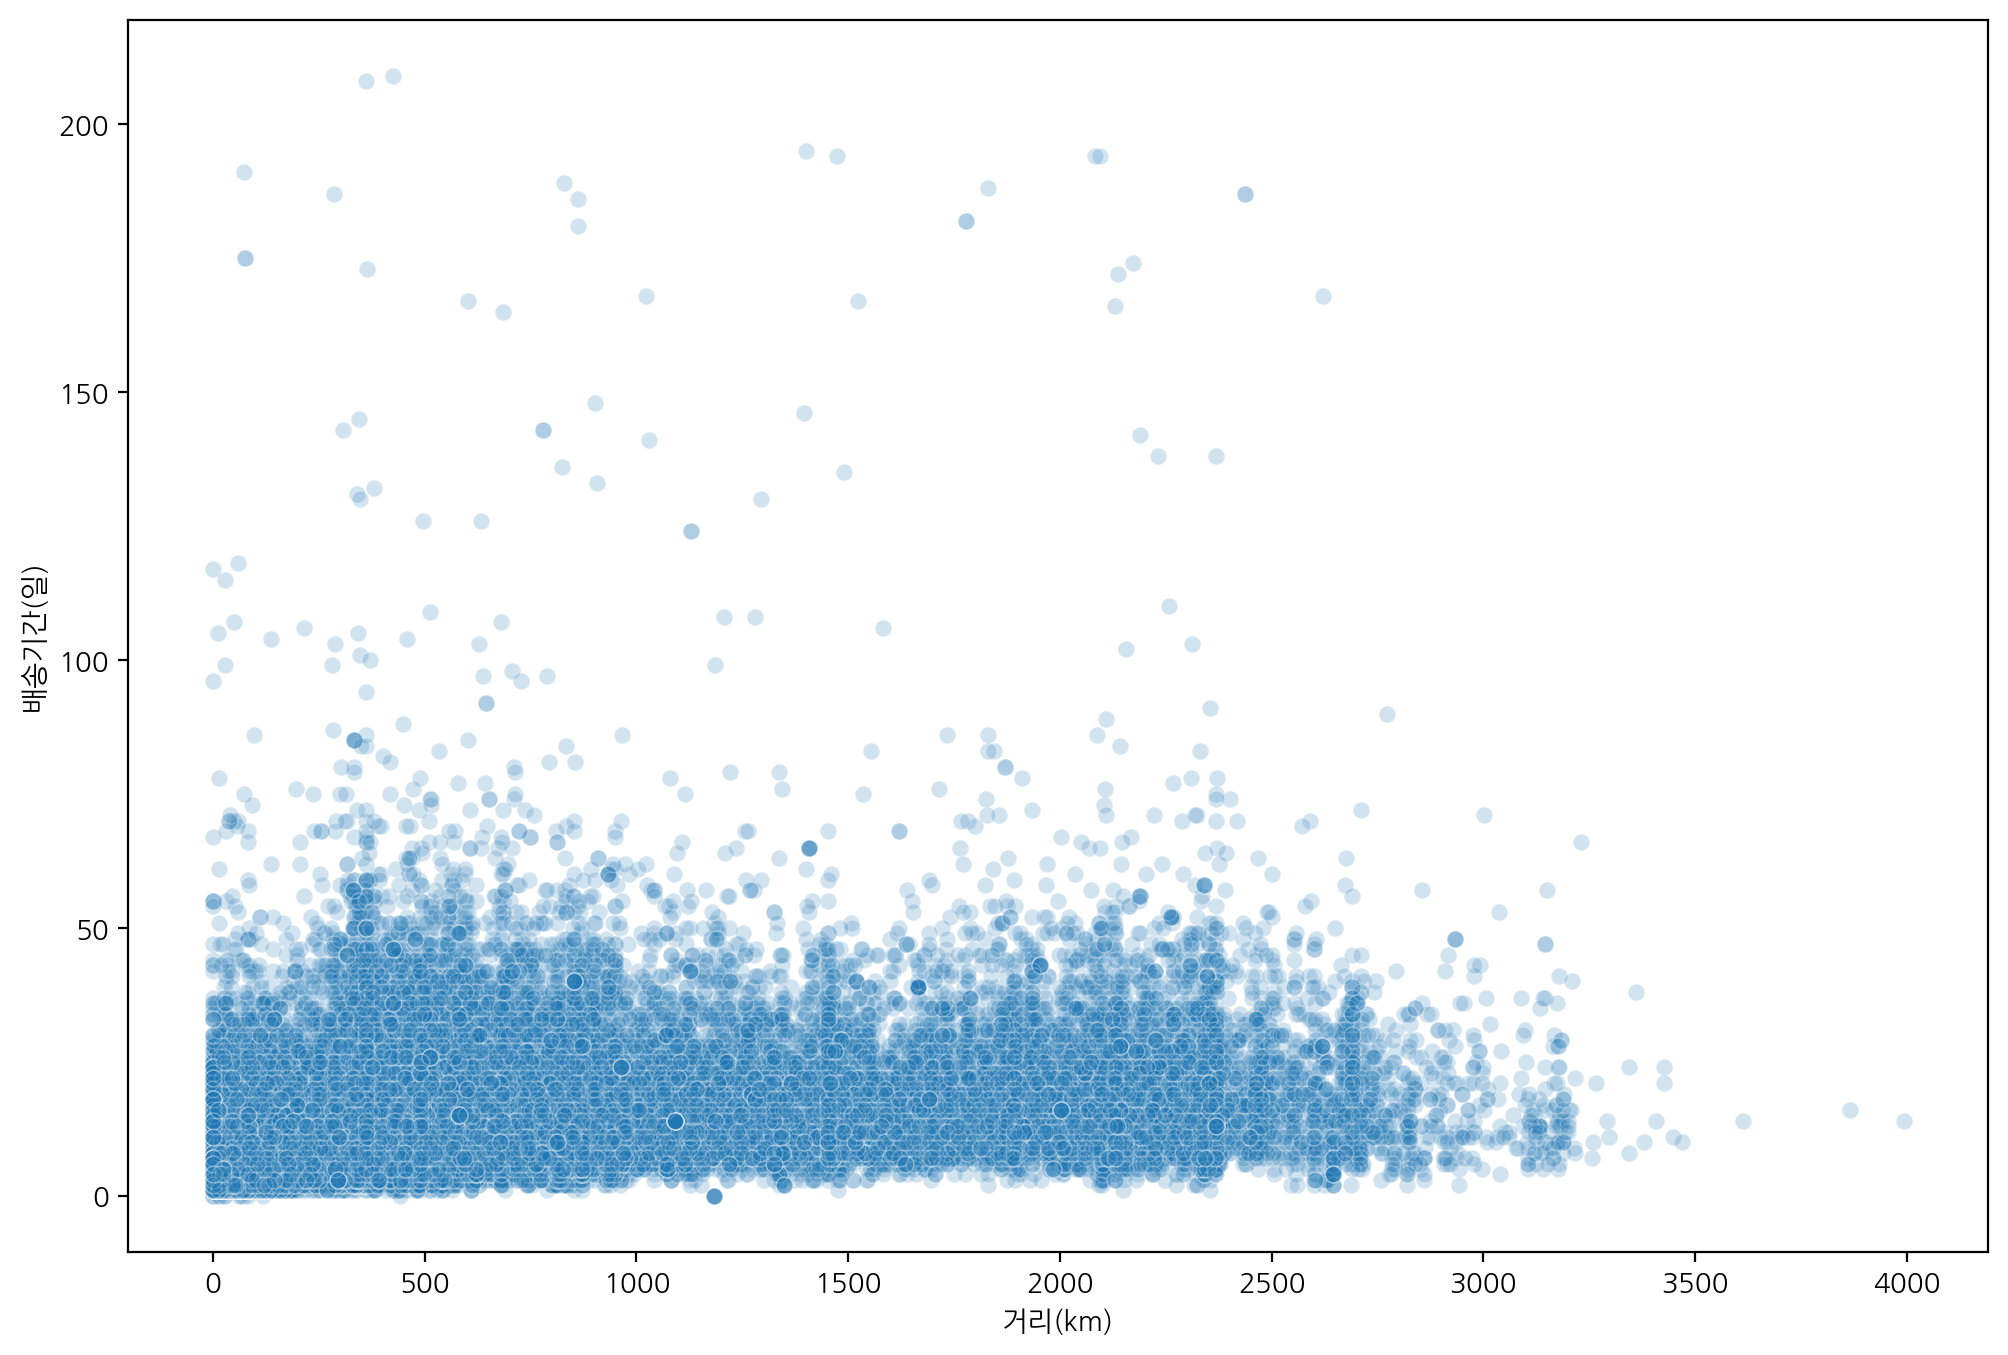

In [71]:
# 이상치 제거 후 시각화
plt.figure(figsize=(12,8))
sns.scatterplot(data = oicsg_df2, x= "거리(km)", y="배송기간(일)", alpha = .2)

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_96989/1537100553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = oicsg_df2.corr(method = "pearson")


<AxesSubplot: >

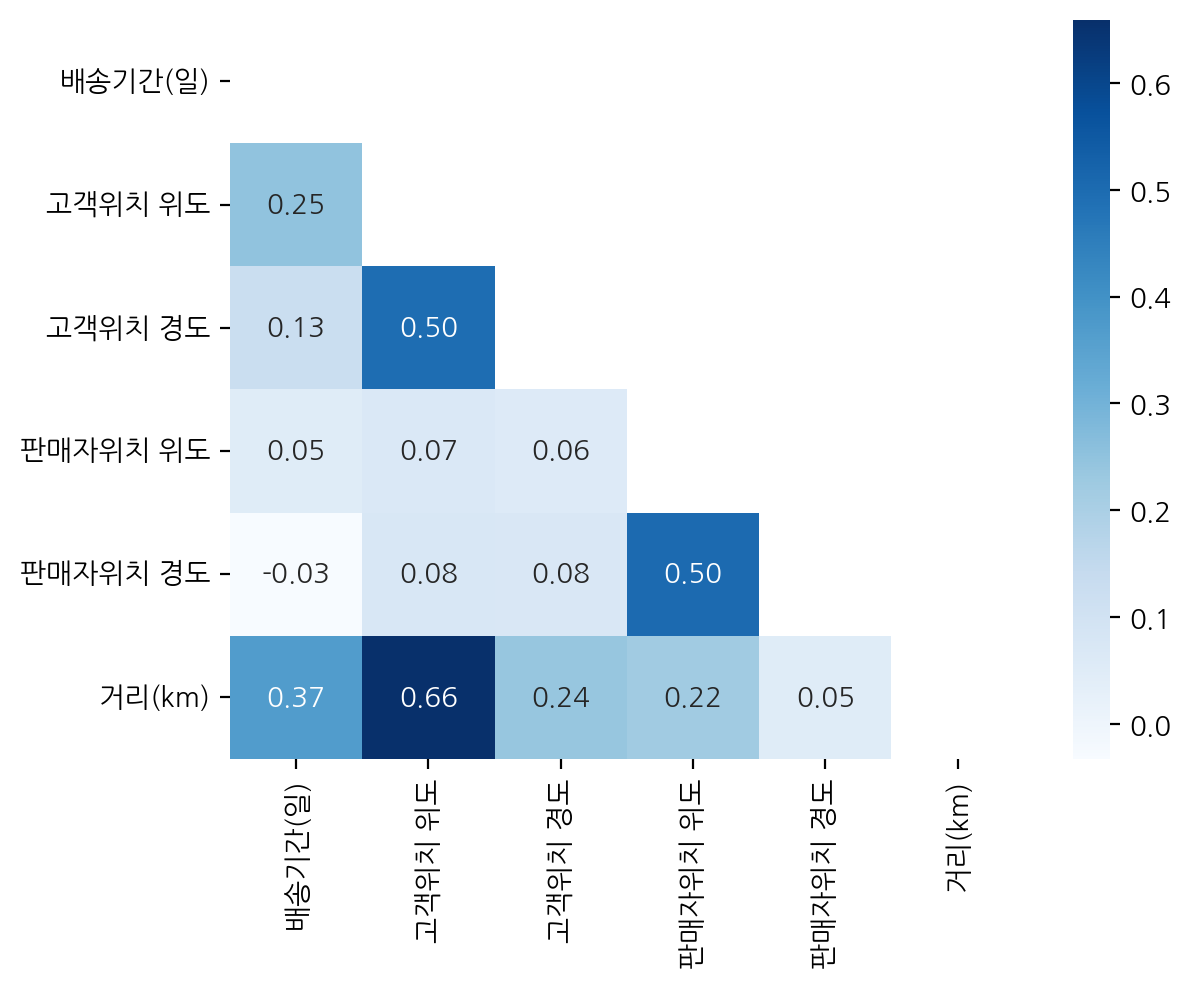

In [72]:
corr = oicsg_df2.corr(method = "pearson")
mask = np.triu(np.ones_like(corr)) # 삼각행렬로 나타내기 위한 마스크
sns.heatmap(corr,annot = True, cmap = "Blues", mask = mask, fmt = '.2f')

In [47]:
review_df = review[["order_id","review_score"]]

In [48]:
oicsgr_df = pd.merge(oicsg_df2, review_df, on ="order_id", how = "left")

In [49]:
oicsgr_df = oicsgr_df.drop(columns=["seller_id", "customer_id"])

In [50]:
oicsgr_df = oicsgr_df.sort_values(by = "distance", ascending= False)

In [51]:
oicsgr_df

,order_id,delivery_period,customer_city,seller_city,customer_lat,customer_lng,seller_lat,seller_lng,distance,review_score
74378,a48afd5d3f7546105c87adca63347dd4,14.0,santa maria,cascavel,-34.586422,-58.732101,-4.123007,-38.245152,3992.15985,5.0
46634,25c2eab805f9b909edeed8b42bd4a0dc,16.0,santa maria,sao luis,-34.586422,-58.732101,-2.524427,-44.290479,3865.82266,5.0
88877,de4f573359ebca3ee24bbe7cddb31052,14.0,camaragibe,floresta,-8.026056,-34.995573,-9.982875,-67.844628,3612.75187,5.0
85041,7d6ffa9ff53fd7da04eb9025ba231be2,10.0,santana do livramento,lages,-30.888468,-55.512956,-4.012780,-38.700000,3468.88895,5.0
74436,5e24cd2a73451af2660215702f8abc57,11.0,bage,cascavel,-31.305341,-54.111368,-4.123007,-38.245152,3447.98937,5.0
...,...,...,...,...,...,...,...,...,...,...
39975,9209a059ff5ac34761920d895dd2d7ee,5.0,rio de janeiro,rio de janeiro,-22.902472,-43.174059,-22.902472,-43.174059,0.00000,4.0
39972,3ffd96ca0884bf472feae91fe6f1de09,2.0,rio de janeiro,rio de janeiro,-22.902472,-43.174059,-22.902472,-43.174059,0.00000,5.0
39965,2218e4b81089f8cf52139915bdc1e48d,1.0,rio de janeiro,rio de janeiro,-22.902472,-43.174059,-22.902472,-43.174059,0.00000,5.0
39963,4c711260ad2538b278a96e13da501b09,3.0,rio de janeiro,rio de janeiro,-22.902472,-43.174059,-22.902472,-43.174059,0.00000,5.0
